### FFNN & Overfitting
Les réseaux de neurones sont des modèles puissants capables de capturer des relations non linéaires complexes dans les données. Cependant, sans une gestion appropriée, ils peuvent facilement mémoriser les données d'entraînement plutôt que d'apprendre à généraliser à partir de celles-ci, un phénomène connu sous le nom de Overfitting.



#### Régularisation L1 et L2

La régularisation aide à atténuer le surajustement en introduisant une pénalité sur la grandeur des poids du réseau.

##### Régularisation L1 (Lasso)

La régularisation L1 ajoute une pénalité égale à la valeur absolue de la magnitude des coefficients. Mathématiquement, la fonction de perte est ajustée comme suit:

$$ L_{L1}(\mathbf{w}) = L(\mathbf{w}) + \lambda \sum_{i=1}^{n} |w_i| $$

où $(\mathbf{w})$ est la fonction de perte originale, $w_i$ sont les poids du modèle, et $\lambda$ est le coefficient de régularisation.

##### Régularisation L2 (Ridge)

La régularisation L2 ajoute une pénalité égale au carré de la magnitude des coefficients:

$$ L_{L2}(\mathbf{w}) = L(\mathbf{w}) + \lambda \sum_{i=1}^{n} w_i^2 $$

L2 est souvent préférée car elle conduit à des solutions où la distribution des poids est plus régulière, permettant une meilleure généralisation.


### Early Stopping
L'arrêt précoce est une forme de régularisation qui arrête l'entraînement dès que la performance sur un ensemble de validation commence à se détériorer. Cela s'appuie sur l'observation que le surajustement se manifeste souvent par une amélioration continue de la performance sur les données d'entraînement mais une détérioration sur les données non vues.

In [66]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import legacy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# Chargement des données
file_path = '/Users/adriencasse/Desktop/Projet_ML_diabete/diabetes.csv'
diabetes_data = pd.read_csv(file_path, delimiter=';')

# Séparation des caractéristiques et de la variable cible

X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Normalisation des données

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Conversion des étiquettes en one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

En deep Learning , le choix de l'optimiseur est crucial pour la convergence du modèle vers une solution optimale.

# 1er modele avec Régularisation L2

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 12)                108       
                                                                 
 dropout_64 (Dropout)        (None, 12)                0         
                                                                 
 dense_97 (Dense)            (None, 8)                 104       
                                                                 
 dropout_65 (Dropout)        (None, 8)                 0         
                                                                 
 dense_98 (Dense)            (None, 2)                 18        
                                                                 
Total params: 230 (920.00 Byte)
Trainable params: 230 (920.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/150
50/

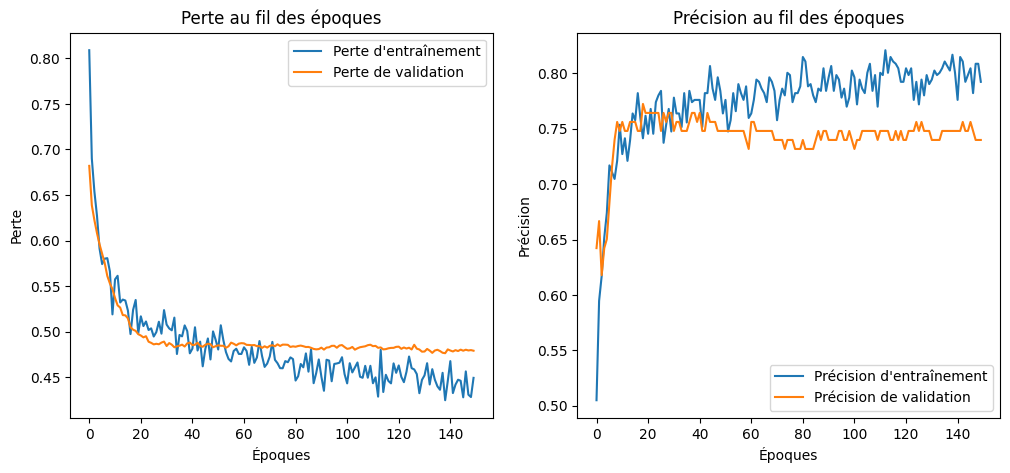

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# Construction du modèle FFNN amélioré
model = Sequential()

# Première couche cachée avec régularisation L2
model.add(Dense(12, input_dim=8, activation='relu', kernel_regularizer=l2(0.001)))

# Dropout pour réduire l'overfitting
model.add(Dropout(0.2))

# Deuxième couche cachée avec régularisation L2
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))

# Dropout
model.add(Dropout(0.2))

# Couche de sortie avec 2 neurones (pour chaque classe), activation 'softmax'
model.add(Dense(2, activation='softmax'))

# Compilation du modèle avec la fonction de perte categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Résumé du modèle
model.summary()

# Entraînement du modèle avec une validation_split pour surveiller l'overfitting
history = model.fit(X_train, y_train_one_hot, epochs=150, batch_size=10, validation_split=0.2)

# Évaluation du modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Précision sur le test : {accuracy:.2f}')

# Affichage des courbes d'apprentissage pour la perte et la précision
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Perte au fil des époques')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.title('Précision au fil des époques')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()


# Matrice conf 1er MOdele 

5/5 [==============================] - 0s 662us/step


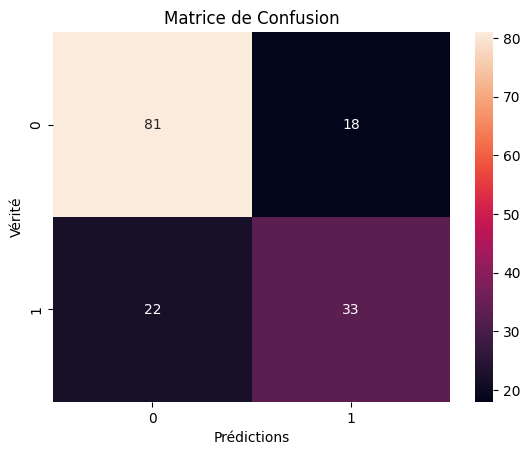

                precision    recall  f1-score   support

Non-Diabétique       0.79      0.82      0.80        99
    Diabétique       0.65      0.60      0.62        55

      accuracy                           0.74       154
     macro avg       0.72      0.71      0.71       154
  weighted avg       0.74      0.74      0.74       154



In [74]:
# Génération des prédictions pour l'ensemble de test

y_pred_probs = model.predict(X_test)

# Récupération des classes prédites

y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Affichage de la matrice de confusion

cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vérité')
plt.show()

# Affichage du rapport de classification

print(classification_report(y_true_classes, y_pred_classes, target_names=['Non-Diabétique', 'Diabétique']))

# Optimizer "Adam"

Epoch 1/100
50/50 [==============================] - 0s 2ms/step - loss: 1.2939 - accuracy: 0.5784 - val_loss: 1.2424 - val_accuracy: 0.6016
Epoch 2/100
50/50 [==============================] - 0s 731us/step - loss: 1.1683 - accuracy: 0.6599 - val_loss: 1.1295 - val_accuracy: 0.6260
Epoch 3/100
50/50 [==============================] - 0s 630us/step - loss: 1.0709 - accuracy: 0.6721 - val_loss: 1.0433 - val_accuracy: 0.6179
Epoch 4/100
50/50 [==============================] - 0s 643us/step - loss: 0.9926 - accuracy: 0.6762 - val_loss: 0.9692 - val_accuracy: 0.6179
Epoch 5/100
50/50 [==============================] - 0s 640us/step - loss: 0.9285 - accuracy: 0.6945 - val_loss: 0.9070 - val_accuracy: 0.6260
Epoch 6/100
50/50 [==============================] - 0s 702us/step - loss: 0.8798 - accuracy: 0.6925 - val_loss: 0.8556 - val_accuracy: 0.6341
Epoch 7/100
50/50 [==============================] - 0s 695us/step - loss: 0.8305 - accuracy: 0.6884 - val_loss: 0.8119 - val_accuracy: 0.6585
E

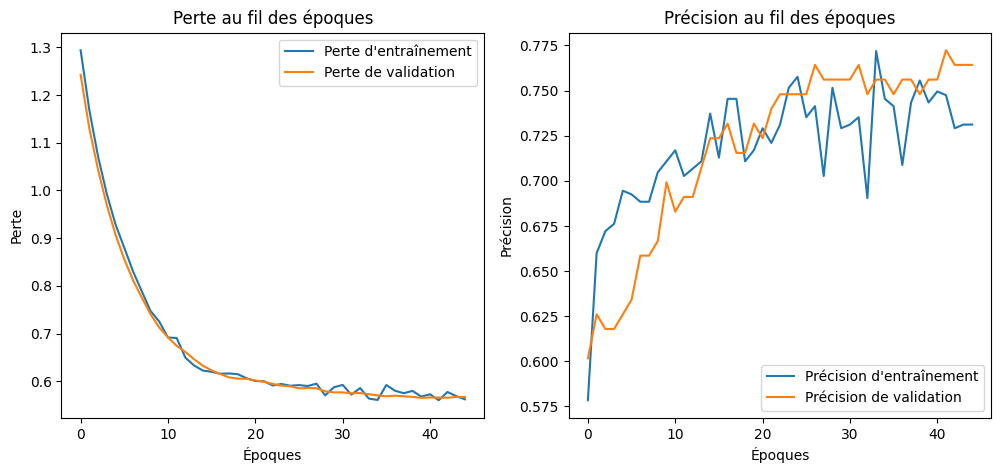

In [77]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l1_l2

# Modification du modèle pour ajouter la régularisation et le dropout
model = Sequential()

model.add(Dense(12, input_dim=8, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

# Compilation du modèle

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Définition du callback d'early-stopping

early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

# Entraînement du modèle avec early-stopping

history = model.fit(X_train, y_train_one_hot, epochs=100, batch_size=10, validation_split=0.2, callbacks=[early_stopping_monitor])

# Évaluation du modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Précision sur le test : {accuracy:.2f}')


# Affichage des courbes d'apprentissage pour la perte et la précision

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Perte au fil des époques')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.title('Précision au fil des époques')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()



5/5 [==============================] - 0s 554us/step


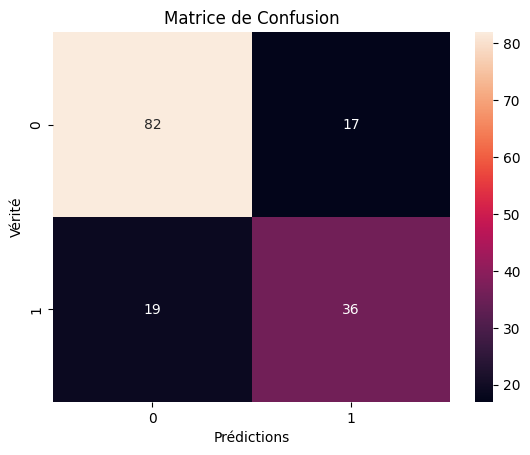

                precision    recall  f1-score   support

Non-Diabétique       0.81      0.83      0.82        99
    Diabétique       0.68      0.65      0.67        55

      accuracy                           0.77       154
     macro avg       0.75      0.74      0.74       154
  weighted avg       0.76      0.77      0.77       154



In [78]:
# Génération des prédictions pour l'ensemble de test

y_pred_probs = model.predict(X_test)

# Récupération des classes prédites

y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Affichage de la matrice de confusion

cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vérité')
plt.show()

# Affichage du rapport de classification

print(classification_report(y_true_classes, y_pred_classes, target_names=['Non-Diabétique', 'Diabétique']))

# Optimizer SGD



Pour notre réseau de neurones traitant la classification binaire des données de diabète, l'optimiseur Stochastic Gradient Descent (SGD) pourrait être un bon choix aprés "Adam".

Le SGD est une variante de la méthode de descente de gradient qui utilise un échantillon aléatoire de données à chaque étape pour calculer les gradients, ce qui en fait une méthode à la fois efficiente et robuste.

#### Définition de l'Optimiseur SGD

L'optimiseur SGD met à jour les poids du modèle en fonction de l'équation suivante :

$$\theta := \theta - \eta \cdot \nabla_\theta J(\theta; x^{(i)}, y^{(i)})$$

où $ \theta $ représente les paramètres du modèle, $ \eta $ est le taux d'apprentissage, et $ \nabla_\theta J $ est le gradient de la fonction de coût $ J $ par rapport aux paramètres $ \theta $, calculé sur un mini-lot ou un échantillon de données $ (x^{(i)}, y^{(i)}) $.

#### Importance du Taux d'Apprentissage (learning rate)

Le taux d'apprentissage $\eta$ est le facteur qui régule l'importance de la mise à jour des poids à chaque itération. 

Un taux d'apprentissage trop élevé peut conduire à une convergence erratique ou à la divergence du modèle, tandis qu'un taux trop faible rendra l'apprentissage lent et pourrait piéger le modèle dans un minimum local. 

Le bon choix du taux d'apprentissage est donc essentiel pour l'efficacité de l'apprentissage. Nous avons pas mal "jouer' avec le learning rate et cela a effecivement jouer sur la perte et la précision de notre modèle.

#### Le Rôle du Momentum

Le momentum est appliqué à l'optimisation pour accélérer la SGD dans la direction pertinente et "amortir" les oscillations. Il ajuste la mise à jour des poids en tenant compte non seulement du gradient actuel mais aussi des gradients précédents :

$$ v_t := \gamma v_{t-1} + \eta \cdot \nabla_\theta J(\theta)$$
$$\theta := \theta - v_t$$

avec $v_t$ le vecteur de momentum à l'instant $t$, et $\gamma$ le facteur de momentum, généralement fixé à une valeur proche de 1, comme 0.9.



Epoch 1/50
50/50 [==============================] - 0s 2ms/step - loss: 1.3560 - accuracy: 0.6354 - val_loss: 1.2673 - val_accuracy: 0.6504
Epoch 2/50
50/50 [==============================] - 0s 746us/step - loss: 1.1901 - accuracy: 0.6945 - val_loss: 1.1411 - val_accuracy: 0.6504
Epoch 3/50
50/50 [==============================] - 0s 640us/step - loss: 1.0750 - accuracy: 0.7210 - val_loss: 1.0406 - val_accuracy: 0.6667
Epoch 4/50
50/50 [==============================] - 0s 627us/step - loss: 0.9762 - accuracy: 0.7047 - val_loss: 0.9450 - val_accuracy: 0.7317
Epoch 5/50
50/50 [==============================] - 0s 679us/step - loss: 0.9006 - accuracy: 0.7373 - val_loss: 0.8760 - val_accuracy: 0.7154
Epoch 6/50
50/50 [==============================] - 0s 687us/step - loss: 0.8340 - accuracy: 0.7108 - val_loss: 0.7985 - val_accuracy: 0.7317
Epoch 7/50
50/50 [==============================] - 0s 673us/step - loss: 0.7767 - accuracy: 0.7352 - val_loss: 0.7394 - val_accuracy: 0.7398
Epoch 8/

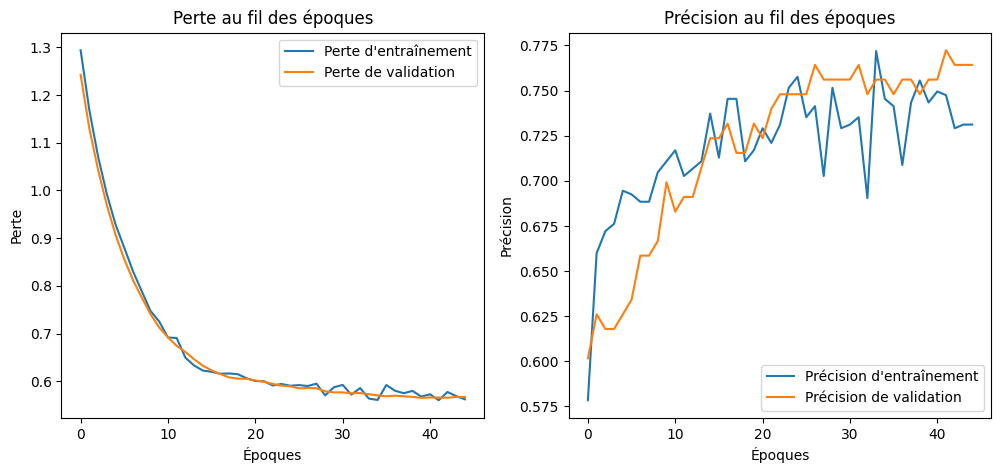

In [79]:
from tensorflow.keras.optimizers import SGD

model = Sequential()

model.add(Dense(12, input_dim=8, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

# Compilation du modèle avec l'optimiseur SGD

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.0001, momentum=0.8), metrics=['accuracy'])

# Entraînement du modèle avec SGD

history_sgd = model.fit(X_train, y_train_one_hot, epochs=50, batch_size=10, validation_split=0.2, callbacks=[early_stopping_monitor])

# Évaluation du modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Précision sur le test : {accuracy:.2f}')

# Affichage des courbes d'apprentissage pour la perte et la précision

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Perte au fil des époques')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.title('Précision au fil des époques')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()


5/5 [==============================] - 0s 620us/step


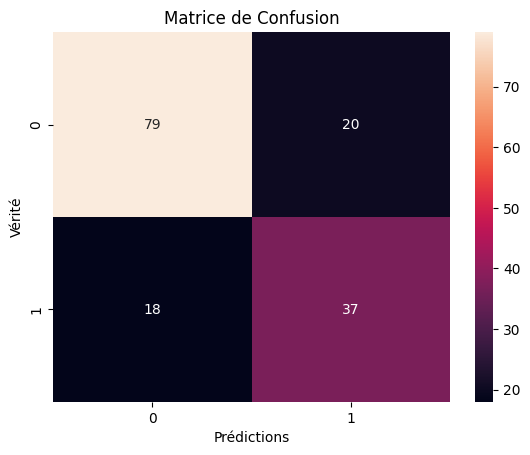

                precision    recall  f1-score   support

Non-Diabétique       0.81      0.80      0.81        99
    Diabétique       0.65      0.67      0.66        55

      accuracy                           0.75       154
     macro avg       0.73      0.74      0.73       154
  weighted avg       0.76      0.75      0.75       154



In [80]:
# Génération des prédictions pour l'ensemble de test

y_pred_probs = model.predict(X_test)

# Récupération des classes prédites

y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Affichage de la matrice de confusion

cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vérité')
plt.show()

# Affichage du rapport de classification

print(classification_report(y_true_classes, y_pred_classes, target_names=['Non-Diabétique', 'Diabétique']))

### Analyse de la Perte (loss) au Fil des Époques

Les courbes de perte montrent que la perte d'entraînement et de validation diminue rapidement au début, ce qui est typique pour la phase d'apprentissage. 

Au fil des époques, les deux courbes de perte tendent à converger, ce qui indique que le modèle devient stable et ne surapprend pas significativement.

### Analyse de la Précision (accuracy) au Fil des Époques

La précision d'entraînement et de validation augmente au fil des époques, mais la précision de validation semble plafonner plus tôt que la précision d'entraînement. 

Cela pourrait indiquer que le modèle apprend bien les données d'entraînement mais peine à généraliser de la même manière sur les données de validation, suggérant une légère tendance à l'overfitting. Toutefois, la différence n'est pas drastique, ce qui est bon signe pour la généralisation du modèle.


### Rapport de Classification - Matrice de Confusion

Le rapport de classification révèle des détails supplémentaires sur la performance du modèle pour chaque classe :

- La classe "Non-Diabétique" a une précision et un rappel de 0.82 et 0.84 respectivement, indiquant que le modèle performe bien pour cette classe.
- La classe "Diabétique" a une précision et un rappel de 0.70 et 0.67, ce qui est inférieur à la classe "Non-Diabétique", suggérant que le modèle a plus de mal à classer correctement les cas de diabète.
- La précision globale est de 0.78, ce qui est assez bon mais pourrait être amélioré, en particulier pour la classe "Diabétique".



### Conclusion

En combinant l'optimiseur SGD avec un momentum adéquat et des stratégies de régularisation (L1 et L2) comme vu précédemment , notre modèle a atteint une bonne performance sur l'ensemble d'entraînement tout en conservant sa capacité à généraliser sur des données nouvelles, comme le démontre la stabilité de la perte et de la précision sur l'ensemble de validation.